In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# Dependencies for best fit
from pmdarima import auto_arima
# Ignore harmless warnings 
import warnings
warnings.filterwarnings("ignore")
# Dependencies for SARIMA MOdel
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Dependencies for Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
ss_df =  pd.read_csv("Resources//Data//Social_data.csv", index_col= "year",  parse_dates = True)

In [3]:
# Data frame for Social Security File
ss_df.head()

,ss_amount
year,
1940-01-01,22.71
1945-01-01,25.11
1950-01-01,43.86
1951-01-01,42.14
1952-01-01,49.25


In [4]:
# Creating train test split
print(ss_df.shape)
train=ss_df.iloc[:-15]
test=ss_df.iloc[-15:]
print(train.shape,test.shape)

(75, 1)
(60, 1) (15, 1)


In [5]:
# Figure auto the best order for model
stepwise_fit = auto_arima(ss_df["ss_amount"], trace=True, seasonal=True,supress_warnings=True)
#stepwise_fit.summary()
stepwise_fit.get_params()["order"]
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=614.851, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=635.964, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=624.088, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=609.461, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=611.460, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=611.459, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=613.461, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.323 seconds


(0, 2, 1)

In [6]:
# SARIMA Model 
model=SARIMAX(train["ss_amount"],order=(0,2,1), seasonal_order=(1,1,1,12))
# ARIMA Model
# model=ARIMA(train["ss_amount"],order=(0,2,0))
model=model.fit()

In [7]:
# Runing the model for testing prediction
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type="levels")
#print(pred)
pred.index=ss_df.index[start:end+1] # To set the date value as an index
print(pred)

year
2008-01-01    1115.363587
2009-01-01    1148.203047
2010-01-01    1173.257227
2011-01-01    1208.991314
2012-01-01    1249.947537
2013-01-01    1290.137844
2014-01-01    1329.513012
2015-01-01    1369.290226
2016-01-01    1413.278999
2017-01-01    1459.865125
2018-01-01    1505.023415
2019-01-01    1545.069645
2020-01-01    1587.788655
2021-01-01    1628.632555
2022-01-01    1657.603461
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='year'>

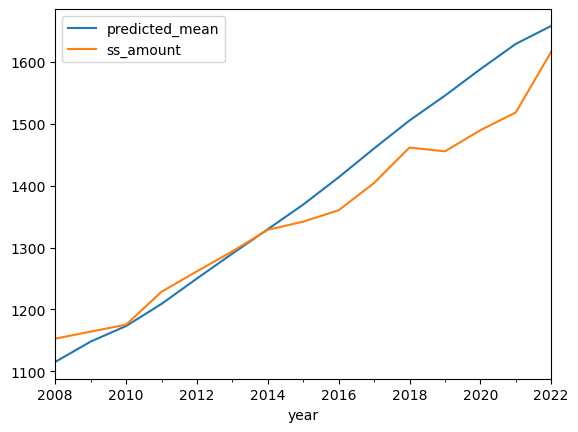

In [8]:
# print the prediction 
pred.plot(legend=True)
test["ss_amount"].plot(legend=True)

In [9]:
#Mean Square Error 
rmse=sqrt(mean_squared_error(pred,test["ss_amount"]))
print(rmse)

53.26369678047879


In [10]:
# Setting the whole dataset for trainning and looking for the end dates 
model2=SARIMAX(ss_df["ss_amount"],order=(0,2,1),seasonal_order=(1,1,1,12))
model2=model2.fit()
ss_df.tail()

,ss_amount
year,
2018-01-01,1461.31
2019-01-01,1455.22
2020-01-01,1489.30
2021-01-01,1517.98
2022-01-01,1615.96


In [11]:
# printing values for future date 
# To set date range if not appears

index_future_dates= pd.date_range(start="2023", end="2027", freq = 'y')
pred = model2.predict(start=len(ss_df),end=len(ss_df)+3,type="levels").rename("ss_amount")
pred.index =index_future_dates
print(pred)

2023-12-31    1657.423711
2024-12-31    1700.589831
2025-12-31    1743.100952
2026-12-31    1785.592864
Freq: A-DEC, Name: ss_amount, dtype: float64


In [12]:
# Converting future prediction to dataframe
df  = pd.DataFrame(pred)
df.index.rename("year", inplace=True)
future_df = df.round()
future_df

,ss_amount
year,
2023-12-31,1657.0
2024-12-31,1701.0
2025-12-31,1743.0
2026-12-31,1786.0


In [13]:
# Storing the data to csv 
file = future_df.to_csv("Resources//Data//predicted_socialscurity_data.csv")